## Transfer learning with SqueezeNet

These cells do the essential tasks from the previous chapter, to load training and testing data, add the labels, then train and evaluate the model. The only difference is using SqueezeNet instead of VisionFeaturePrint_Screen as the base model for transfer learning.

There's an option to load the pre-trained model.

In [1]:
import turicreate as tc
import matplotlib.pyplot as plt

In [2]:
train_data = tc.image_analysis.load_images("snacks/train", with_path=True)
len(train_data)

952

In [ ]:
test_data = tc.image_analysis.load_images("snacks/test", with_path=True)
len(test_data)

In [20]:
import os
train_data["label"] = train_data["path"].apply(lambda path: 
                                               os.path.basename(os.path.split(path)[0]))
test_data["label"] = test_data["path"].apply(lambda path: 
                                             os.path.basename(os.path.split(path)[0]))
train_data["label"].value_counts().print_rows(num_rows=20)
test_data["label"].value_counts().print_rows(num_rows=20)

+------------+-------+
|   value    | count |
+------------+-------+
| pineapple  |  260  |
|  hot dog   |  250  |
|   grape    |  250  |
|   apple    |  250  |
|   juice    |  250  |
| ice cream  |  250  |
|   banana   |  250  |
| watermelon |  250  |
|   salad    |  250  |
|   muffin   |  250  |
|  doughnut  |  250  |
|   waffle   |  250  |
|   cookie   |  249  |
|   carrot   |  249  |
|    cake    |  249  |
| strawberry |  249  |
|   candy    |  249  |
|   orange   |  249  |
|  popcorn   |  180  |
|  pretzel   |  154  |
+------------+-------+
[20 rows x 2 columns]

+------------+-------+
|   value    | count |
+------------+-------+
|  doughnut  |   50  |
|  hot dog   |   50  |
|   grape    |   50  |
|   apple    |   50  |
|   juice    |   50  |
| ice cream  |   50  |
|   banana   |   50  |
| watermelon |   50  |
|   salad    |   50  |
|   candy    |   50  |
|   orange   |   50  |
|    cake    |   50  |
|   cookie   |   50  |
|   carrot   |   50  |
|   waffle   |   50  |
| strawberr

Run the next cell to train the model.

**OR**

Run the cell **after** the next cell, to load the model from the current folder.

In [ ]:
# Train the image classifier
model = tc.image_classifier.create(train_data, target="label", 
                                   model="squeezenet_v1.1",
                                   verbose=True, max_iterations=100)

In [4]:
# OR load HealthySnacks.model from current folder
model = tc.load_model("HealthySnacks.model")

In [5]:
model.classifier

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 19019
Number of examples             : 4571
Number of classes              : 20
Number of feature columns      : 1
Number of unpacked features    : 1000

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 100
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 56.4757

Settings
--------
Log-likelihood                 : 2925.4582

Highest Positive Coefficients
-----------------------------
(intercept)                    : 0.381
(intercept)                    : 0.2139
__image_features__[271]        : 0.119
__image_features__[387]        : 0.1134
__image_features__[839]        : 0.1106

Lowest Negative Coefficients
----------------------------
(intercept)                    : -0.3

Continue with trained or loaded model.

In [6]:
metrics = model.evaluate(test_data)
print("Accuracy: ", metrics["accuracy"])
print("Precision: ", metrics["precision"])
print("Recall: ", metrics["recall"])

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 1.19s        | 6.5%             |

| 128              | 2.50s        | 13.25%           |

| 192              | 3.52s        | 20%              |

| 256              | 4.58s        | 26.5%            |

| 320              | 5.42s        | 33.25%           |

| 640              | 10.71s       | 66.5%            |

| 952              | 14.94s       | 100%             |

+------------------+--------------+------------------+

Accuracy:  0.6607142857142857
Precision:  0.6625686789687794
Recall:  0.6577568027210883


## Getting individual predictions

In [7]:
model.predict(test_data)

dtype: str
Rows: 952
['apple', 'grape', 'orange', 'orange', 'orange', 'apple', 'orange', 'apple', 'candy', 'apple', 'grape', 'apple', 'strawberry', 'apple', 'apple', 'carrot', 'candy', 'ice cream', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'pineapple', 'orange', 'apple', 'apple', 'apple', 'doughnut', 'grape', 'apple', 'apple', 'orange', 'grape', 'apple', 'orange', 'apple', 'grape', 'apple', 'orange', 'grape', 'apple', 'orange', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'pineapple', 'muffin', 'hot dog', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'hot dog', 'banana', 'banana', 'banana', 'banana', 'pineapple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'juice', 'apple', 'hot dog', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'apple', 'banana', 'banana', 'grape', 'banana', 'orange', 'banana', 'banana', 'banana

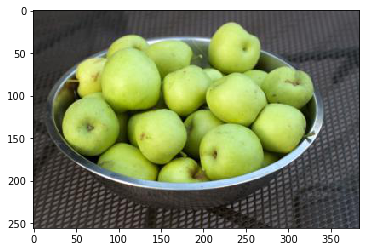

In [8]:
plt.imshow(test_data[1]["image"].pixel_data)

In [9]:
output = model.classify(test_data)
output

Columns:
	class	str
	probability	float

Rows: 952

Data:
+--------+---------------------+
| class  |     probability     |
+--------+---------------------+
| apple  |  0.4326385132863121 |
| grape  |  0.699598450277612  |
| orange |  0.4148821902502113 |
| orange |  0.9300597134095988 |
| orange | 0.37817135281719916 |
| apple  |  0.9915643139757563 |
| orange | 0.42620238429617097 |
| apple  |  0.5843046904699805 |
| candy  |  0.5756168410051123 |
| apple  |  0.9574830190644478 |
+--------+---------------------+
[952 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [10]:
imgs_with_pred = test_data.add_columns(output)
imgs_with_pred.explore()

Materializing SFrame

In [11]:
imgs_filtered = imgs_with_pred[(imgs_with_pred["probability"] > 0.9) & 
                 (imgs_with_pred["label"] != imgs_with_pred["class"] )]
imgs_filtered.explore()

Materializing SFrame

### Sorting the prediction probabilities

In [12]:
predictions = model.predict(test_data, output_type='probability_vector')
print("Probabilities for 2nd image", predictions[1])

Probabilities for 2nd image array('d', [0.20337662077520557, 0.010500386379535839, 2.8464920324200633e-07, 0.0034932724790819624, 0.0013391166287066811, 0.0005122369124003818, 5.118841868115829e-06, 0.699598450277612, 2.0208374302686123e-07, 7.164497444549948e-07, 2.584012081941193e-06, 5.5645094234565224e-08, 0.08066298157942492, 0.00021689939485918623, 2.30074608705137e-06, 3.6511378835730773e-10, 5.345215832976188e-05, 9.897270575019545e-06, 2.1477438456101293e-08, 0.00022540187389448156])


In [13]:
labels = test_data["label"].unique().sort()
preds = tc.SArray(predictions[1])
tc.SFrame({'preds': preds, 'labels': labels}).sort([('preds', False)])

Columns:
	labels	str
	preds	float

Rows: 20

Data:
+------------+------------------------+
|   labels   |         preds          |
+------------+------------------------+
|   grape    |   0.699598450277612    |
|   apple    |  0.20337662077520557   |
|   orange   |  0.08066298157942492   |
|   banana   |  0.010500386379535839  |
|   candy    | 0.0034932724790819624  |
|   carrot   | 0.0013391166287066811  |
|   cookie   | 0.0005122369124003818  |
| watermelon | 0.00022540187389448156 |
| pineapple  | 0.00021689939485918623 |
|   salad    | 5.345215832976188e-05  |
+------------+------------------------+
[20 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

## Increasing max iterations

Run the next cell to load the model from the current folder.

**OR**

Run the two cells **after** the next cell, to train and save the model. 

In [14]:
# Load HealthySnacks_200.model from the current folder
model200 = tc.load_model("HealthySnacks_200.model")

In [ ]:
# Train the image classifier
model200 = tc.image_classifier.create(train_data, target="label", 
                                   model="squeezenet_v1.1",
                                   verbose=True, max_iterations=200)

In [ ]:
model200.save("HealthySnacks_200.model")

Continue with trained or loaded model.

In [15]:
metrics200 = model200.evaluate(test_data)
print("Accuracy: ", metrics200["accuracy"])
print("Precision: ", metrics200["precision"])
print("Recall: ", metrics200["recall"])

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 1.21s        | 6.5%             |

| 128              | 2.50s        | 13.25%           |

| 192              | 3.48s        | 20%              |

| 256              | 4.34s        | 26.5%            |

| 320              | 5.28s        | 33.25%           |

| 640              | 10.25s       | 66.5%            |

| 952              | 16.35s       | 100%             |

+------------------+--------------+------------------+

Accuracy:  0.6428571428571429
Precision:  0.6447263553620883
Recall:  0.6406734693877552


## Confusing apples with oranges?

In [16]:
import numpy as np
import seaborn as sns

def compute_confusion_matrix(metrics, labels):
    num_labels = len(labels)
    label_to_index = {l:i for i,l in enumerate(labels)}

    conf = np.zeros((num_labels, num_labels), dtype=np.int)
    for row in metrics["confusion_matrix"]:
        true_label = label_to_index[row["target_label"]]
        pred_label = label_to_index[row["predicted_label"]]
        conf[true_label, pred_label] = row["count"]
        
    return conf

def plot_confusion_matrix(conf, labels, figsize=(8, 8)):
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(conf, annot=True, fmt="d")
    heatmap.xaxis.set_ticklabels(labels, rotation=45, 
                                 ha="right", fontsize=12)
    heatmap.yaxis.set_ticklabels(labels, rotation=0, 
                                 ha="right", fontsize=12)
    plt.xlabel("Predicted label", fontsize=12)
    plt.ylabel("True label", fontsize=12)
    plt.show()

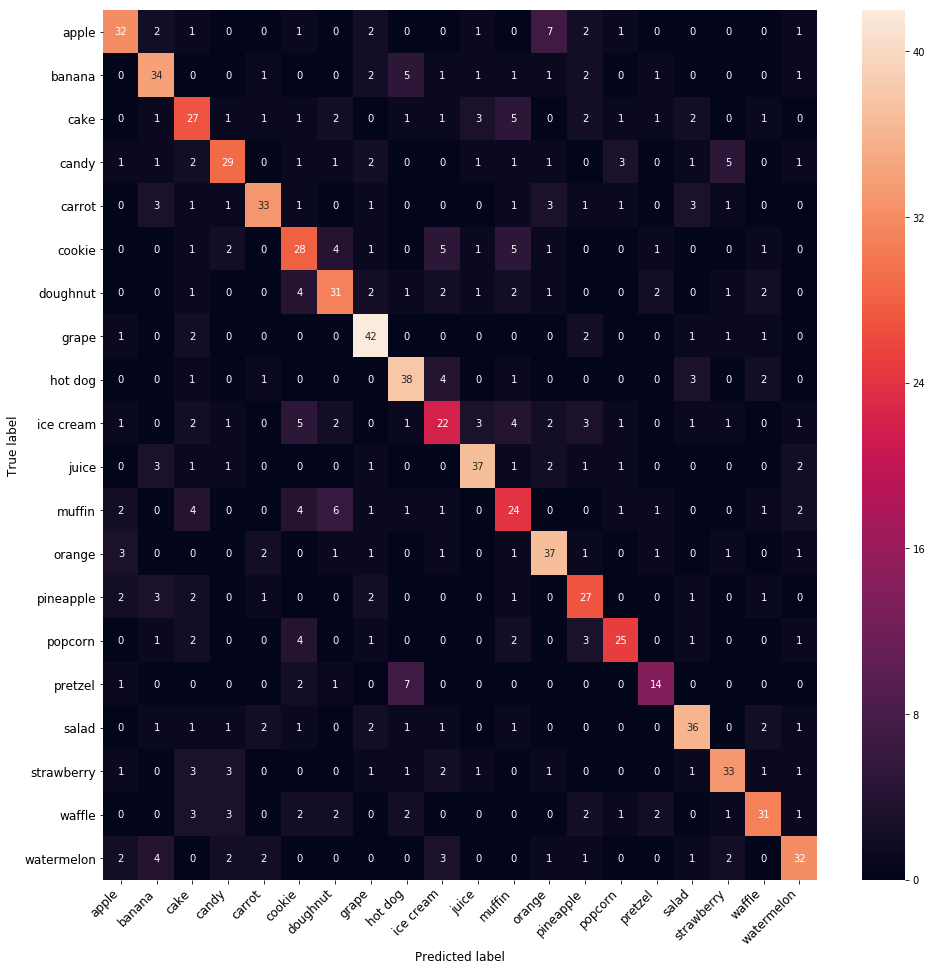

In [18]:
conf = compute_confusion_matrix(metrics200, labels)
plot_confusion_matrix(conf, labels, figsize=(16, 16))

### Computing recall for each class

In [19]:
for i, label in enumerate(labels):
    correct = conf[i, i]
    images_per_class = conf[i].sum()
    print("%10s %.1f%%" % (label, 100. * correct/images_per_class))

     apple 64.0%
    banana 68.0%
      cake 54.0%
     candy 58.0%
    carrot 66.0%
    cookie 56.0%
  doughnut 62.0%
     grape 84.0%
   hot dog 76.0%
 ice cream 44.0%
     juice 74.0%
    muffin 50.0%
    orange 74.0%
 pineapple 67.5%
   popcorn 62.5%
   pretzel 56.0%
     salad 72.0%
strawberry 67.3%
    waffle 62.0%
watermelon 64.0%


## Wrangling Turi Create code 

### Using a fixed validation dataset

In [ ]:
val_data = tc.image_analysis.load_images("snacks/val", with_path=True)
val_data["label"] = val_data["path"].apply(lambda path: 
      os.path.basename(os.path.split(path)[0]))
len(val_data)

### Saving the extracted features

In [ ]:
from turicreate.toolkits import _pre_trained_models
from turicreate.toolkits import _image_feature_extractor

ptModel = _pre_trained_models.MODELS["squeezenet_v1.1"]()
feature_extractor = _image_feature_extractor.MXFeatureExtractor(ptModel)

In [ ]:
train_features = feature_extractor.extract_features(train_data, 
                                          "image", verbose=True)

In [ ]:
extracted_train_features = tc.SFrame({
    "label": train_data["label"],
    '__image_features__': train_features,
    })
extracted_train_features.save("extracted_train_features.sframe")

When you open this notebook again, run the next cell to reload saved features.

In [ ]:
# Run this the next time you open this notebook
extracted_train_features = tc.SFrame("extracted_train_features.sframe")
extracted_val_features = tc.SFrame("extracted_val_features.sframe")

Continue working with extracted features.

In [ ]:
extracted_train_features.head()

In [ ]:
extracted_train_features[0]["__image_features__"]

In [ ]:
val_features = feature_extractor.extract_features(val_data, 
                                      "image", verbose=True)

extracted_val_features = tc.SFrame({
    "label": val_data["label"],
    '__image_features__': val_features,
    })
    
extracted_val_features.save("extracted_val_features.sframe")  

### Training the classifier with regularization

In [ ]:
lr_model = tc.logistic_classifier.create(extracted_train_features,
                             features=['__image_features__'],
                             target="label",
                             validation_set=extracted_val_features,
                             max_iterations=200,
                             seed=None,
                             verbose=True,
                             l2_penalty=10.0, 
                             l1_penalty=0.0,
                             convergence_threshold=1e-8)

### Saving the model

In [ ]:
from turicreate.toolkits.image_classifier import ImageClassifier

state = {
    'classifier': lr_model,
    'model': ptModel.name,
    'max_iterations': lr_model.max_iterations,
    'feature_extractor': feature_extractor,
    'input_image_shape': ptModel.input_image_shape,
    'target': lr_model.target,
    'feature': "image",
    'num_features': 1,
    'num_classes': lr_model.num_classes,
    'classes': lr_model.classes,
    'num_examples': lr_model.num_examples,
    'training_time': lr_model.training_time,
    'training_loss': lr_model.training_loss,
}
model = ImageClassifier(state)

In [ ]:
model.save("HealthySnacks_regularized.model")

In [ ]:
model.export_coreml("HealthySnacks_regularized.mlmodel")

In [ ]:
model

In [ ]:
model.classifier

Reload the no-regularization model to compare the coefficients.

In [ ]:
no_reg_model = tc.load_model("HealthySnacks.model")
no_reg_model.classifier